# IBCS conform Diagrams in Python
(also see https://pandas.pydata.org/pandas-docs/stable/visualization.html)


As you already heard during the lecture data visualization is very import means for understanding data as well as displaying analytics results. Also, the correct choice of visualization can be crucial for transfering the message behind the plots. However, we are going to start with simple visualizations that are not IBCS conform. Later on we will customize the visualizations so that they become aligned with the SUCCESS rules.

<h2>Create diagrams using pandas</h2>
At firts we are going to use the build-in visualization capabilities of pandas (which are in fact based on matplotlib). Therefore we need to import both library <b>pandas</b> and <b>matplotlib.pyplot</b>.


In [1]:
# import librarys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Then we are going to load some data to display into our notebook. In this case we are going to generate some artificial time series data which can then be used to create a <b>line chart</b> or a <b>bar chart</b>.

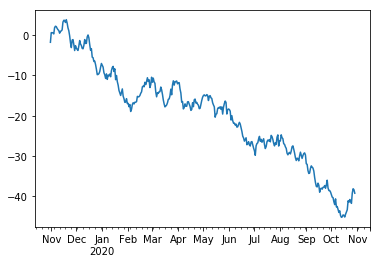

In [8]:
# create a time series with 365 random values starting on 31/10/2019
ts = pd.Series(np.random.randn(365), index=pd.date_range('31/10/2019', periods=365))
# calcluate the cummulative sums 
df = ts.cumsum()
#df.head()
#plot the data
df.plot()

Just like we did above we next create 4 different time series using random_integers.

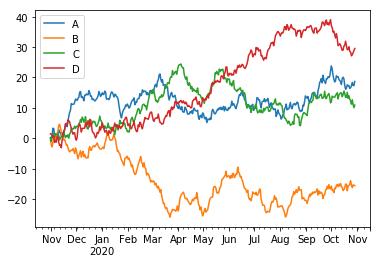

In [9]:
ts2 = pd.DataFrame(np.random.randn(365,4), index=ts.index, columns=list('ABCD'))
df2 = ts2.cumsum()
#df2.head()
df2.plot()


As you can see pandas automatically assignes the values to different series and also adds a legend to the plot. Now we want to use the same data to display a <b>column chart</b>. Therefore we need to sum up the different time series and tell pandas to display a bar chart (which is actually a column chart) using the parameter <i>kind='bar'</i> 

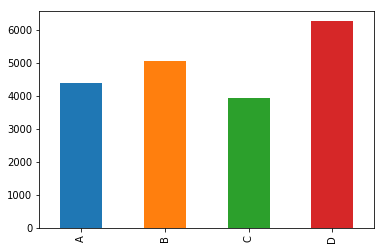

In [10]:
# sum up each series in data frame
dfsum = df2.sum()
# calculate the absolute sums to make the chart look prettier 
dfsum = dfsum.abs()
# plot the bar chart
dfsum.plot(kind='bar')

This chart now displays the summary of the data as it is for one specific point in time (11/1/2018). 
<h2>IBCS conform diagrams using pandas and matplotlib</h2>
As you can see what has been produced in last example is in fact a column chart. The data displayed is no more a time series but a structural diagram therefore it is better to display the values as a vertical diagram. Now it becomes very confusing, because matplotlib calls a vertical bar chart a horizontal bar chart (<i>type='barh'</i>).

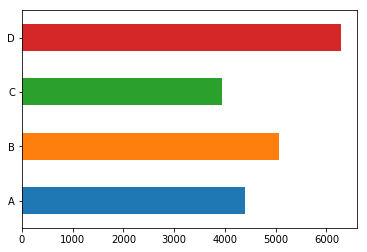

In [11]:
# plot the bar chart as a vertical diagram
dfsum.plot(kind='barh')

Next we add a title to the y axis called e.g. "Product". Therefore we need get an object of type matplotlib.axes.AxesSubplot which is returned when we call *.plot()* on a data frame. 
Also, we want to add a title which tells us what the contents of the chart represent and remove the ticks on the x axis.

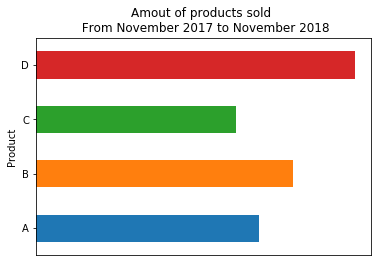

In [12]:
# plot the bar chart as a vertical diagram
ax = dfsum.plot(kind='barh')
ax.set_ylabel("Product")
ax.set_title("Amout of products sold \n From November 2017 to November 2018")
ax.tick_params(bottom=False,labelbottom=False)

Now we have lost the display of values. So according to IBCS we need to attach them to the bars. Also we now unify the color of the bars to gray and disable ticks on the left side. Finally, we are going to sort the values descendingly. 
(see https://matplotlib.org/api/axes_api.html#text-and-annotations)

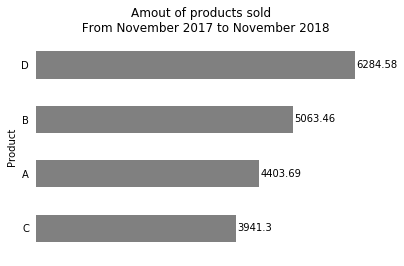

In [13]:
dfsum= dfsum.sort_values()
ax = dfsum.plot(kind='barh',color='gray')
ax.set_ylabel("Product")
ax.set_title("Amout of products sold \n From Oktober 2019 to Oktober 2020")
ax.tick_params(bottom=False,labelbottom=False, left=False)
# add values to bars
for p in ax.patches:
    #           text                          x position               y position
    ax.annotate(str(round(p.get_width(),2)), (p.get_width() * 1.005 , (p.get_y() + 0.2) ))
ax.set_frame_on(False)    


Thereby we have now created an IBCS conform bar chart. Of course there are plenty other types of chart that matplotlib supports. 

## Check Matplotlib for XY Charts
Go to the Matplotlib <a href="https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py">website</a> and work through the tutorials to see the other plots supported. Especially take a look at You have to click on the plots to see the code behind it.